In [227]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("C:\\Users\\관리자\\Desktop\\인공지능 개론\\데이터 셋\\Salary_Data (1).csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<h1>#데이터 모양 확인</h1>

In [228]:
print(data.shape)

(30, 2)


<h1>#결측값 확인</h1>

In [229]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<h1>#딕셔너리 키 확인</h1>

In [230]:
data.keys()

Index(['YearsExperience', 'Salary'], dtype='object')

<h1>#데이터 산점도 확인</h1>

c:\new\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

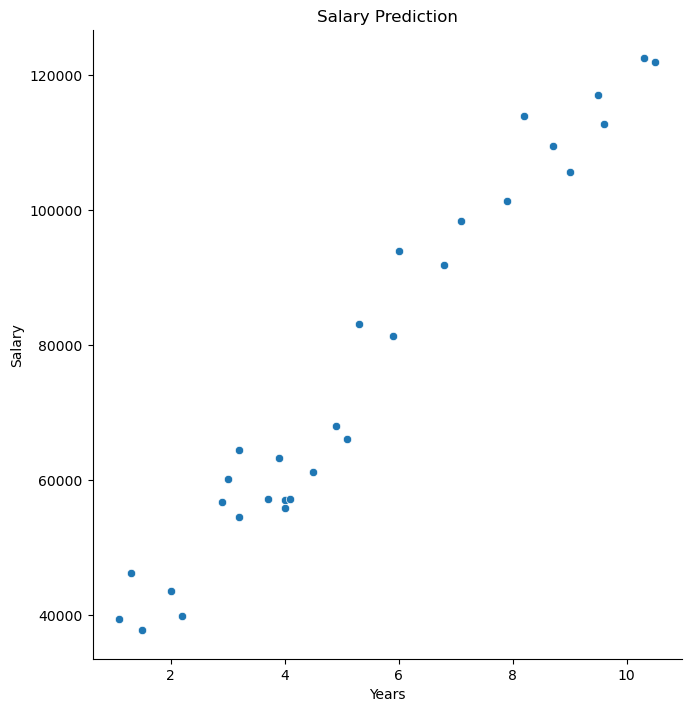

In [231]:
#These Plots help to explain the values and how they are scattered
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=['YearsExperience'],y_vars=['Salary'],size=7,kind='scatter')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.show()

<h1>#훈련세트, 테스트 세트로 나누기</h1>

In [232]:

X=data['YearsExperience']
X


0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

In [242]:
y = data['Salary']
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [234]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3 ,random_state=42)

In [244]:
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

In [236]:
#회귀 모델
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [237]:
regressor.n_neighbors = 3
regressor.fit(X_train, y_train)
print(regressor.score(X_train, y_train))

0.9574526669392872


In [204]:
X_train.shape

(22, 1)

In [238]:
print(regressor.score(X_test,y_test))

0.9414466227178214


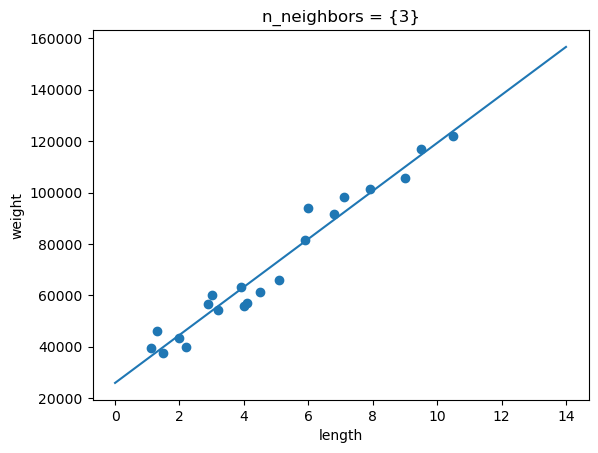

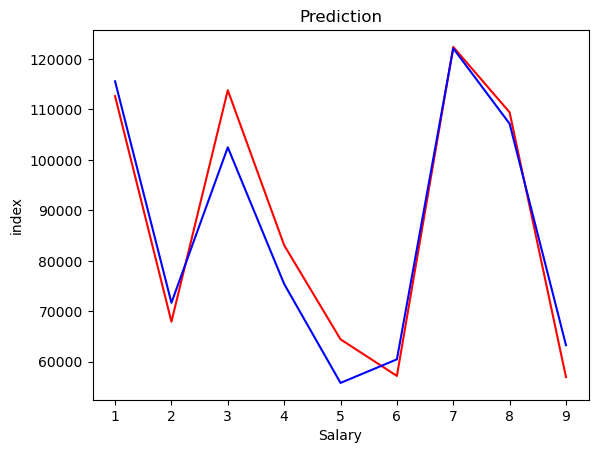

In [239]:
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(0, 15).reshape(-1, 1)

# n = 3일 때 예측 결과를 그래프로 그립니다.
# 모델 훈련
regressor.n_neighbors = 3
regressor.fit(X_train, y_train)
# 지정한 범위 x에 대한 예측 구하기 
prediction =regressor.predict(x)
y_pred = regressor.predict(X_test)
# 훈련 세트와 예측 결과 그래프 그리기
plt.scatter(X_train, y_train)
plt.plot(x, prediction)
plt.title('n_neighbors = {3}')    
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()